Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations
Over 500 iterations


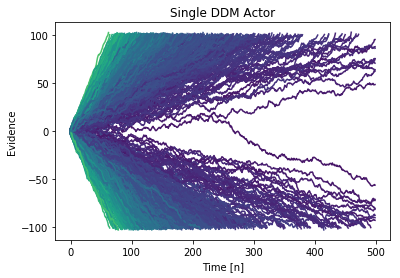

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 17 10:35:09 2019

@author: Gary
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
from matplotlib import cm
import random
%matplotlib inline

def coh():
    temp = [-1,1]
    flipper = temp[random.randint(0,1)]
    return flipper*np.random.beta(4,8)

n_choices = 1000
evi = np.empty((n_choices,500))
evi[:] = np.nan
choice = 0
C2 = []
for n in range(n_choices):
    k      = 2   # Scaling
    C      = coh()  # Coherence
    C2.append(C)
    thresh = 100 # Evidence Threshold
    var    = 1   # Evidence Noise
    
    chosen = 0
    
    ct = 0 # Counter
    t = [0]
    while not chosen:
        if ct >= 500:
            print('Over 500 iterations')
            break
        
        if ct > 0:
            evi[choice,ct] = evi[choice,ct-1]+np.random.normal(k*C,var)
        else:
            evi[choice,ct] = np.random.normal(k*C,var)
        t.append(1*ct)
        if abs(evi[choice,ct]) > thresh:
            chosen = 1
        else:
            ct += 1
    choice += 1
        
fig,ax=plt.subplots()
ax.set_xlabel('Time [n]')
ax.set_ylabel('Evidence')
ax.title.set_text('Single DDM Actor')
C2 = [abs(x) for x in C2]
lines = ax.plot(evi.T)
blank = [ax.lines[i].set_color(cm.viridis(color)) for i, color in enumerate(C2)]

